----
# Recommender System
-----

In this notebook, I aim to build a recommendation system based on the scraped data to provide recommendations to users.

This process includes:

- **TF-IDF Analysis:** Explored to analyze product descriptions and identify key terms.
- **Content-Based Recommender:** Built to suggest similar products based on features.
- **Hybrid Recommender:** Combined content-based filtering with collaborative filtering using average ratings.




## Set Up
----

In [31]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading
---

In [32]:
df = pd.read_csv('../../data/final_data.csv', index_col = 0)

In [33]:
df.shape

(466, 22)

## Content Based Recommender
----

In [34]:
import nltk
import string

# import the nltk stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords 

# Building a bespoke tokenizer
stemmer = nltk.stem.PorterStemmer()
eng_stop_words = stopwords.words('english')
eng_stop_words.append('headphone')
eng_stop_words.append('headphones')
def my_tokenizer(sentence):
    # to remove numbers from reviews 
    sentence = re.sub('[0-9]','',sentence)
    sentence = re.sub(r'–|—', '', sentence)
    # remove punctuation and set all to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # splitting each sentence by space into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    for word in listofwords:  
        # Filtering out stopwords and any tokens that are just empty strings
        if (word not in eng_stop_words) and (word != ''):
            # Stem words -> cut words to their 'root' 
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simybasra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Perfrom TD-IDF Vectorisation on Description


In [36]:
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)  # Prevent line wrapping
pd.set_option('display.max_colwidth', None)  # Display full column content


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialise the TfidfVectorizer to convert text into TF-IDF vectors
tfidf = TfidfVectorizer(tokenizer=my_tokenizer, ngram_range=(2, 2) , min_df = 2)

# Fit and transform the 'Description' column
tfidf_matrix = tfidf.fit_transform(df['Description'])

/Users/simybasra/anaconda3/envs/sound_decisions/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [38]:
tfidf_matrix.shape

(466, 1159)

In [39]:
tf_idf_df = pd.DataFrame(columns=tfidf.get_feature_names_out(), data=tfidf_matrix.toarray(),index = df.index)

In [40]:
tf_idf_df.head(10)

activ nois  adjust children  adjust ear  adjust foldabl  adjust headband  \
0         0.0              0.0         0.0             0.0          0.00000   
1         0.0              0.0         0.0             0.0          0.00000   
2         0.0              0.0         0.0             0.0          0.00000   
3         0.0              0.0         0.0             0.0          0.00000   
4         0.0              0.0         0.0             0.0          0.00000   
5         0.0              0.0         0.0             0.0          0.00000   
6         0.0              0.0         0.0             0.0          0.24878   
7         0.0              0.0         0.0             0.0          0.00000   
8         0.0              0.0         0.0             0.0          0.00000   
9         0.0              0.0         0.0             0.0          0.00000   

   adjust lightweight  adjust mm  adjust nois  adjust onear  \
0                 0.0        0.0          0.0           0.0   
1                 0.0        0.0          0.0           0.0   
2                 0.0        0.0          0.0           0.0   
3                 0.0        0.0          0.0           0.0   
4                 0.0        0.0          0.0           0.0   
5                 0.0        0.0          0.0           0.0   
6                 0.0        0.0          0.0           0.0   
7                 0.0        0.0          0.0           0.0   
8                 0.0        0.0          0.0           0.0   
9                 0.0        0.0          0.0           0.0   

   adjust schooltravelphonepcmpblack  adjust student  adjust wireless  \
0                                0.0             0.0              0.0   
1                                0.0             0.0              0.0   
2                                0.0             0.0              0.0   
3                                0.0             0.0              0.0   
4                                0.0             0.0              0.0   
5                                0.0             0.0              0.0   
6                                0.0             0.0              0.0   
7                                0.0             0.0              0.0   
8                                0.0             0.0              0.0   
9                                0.0             0.0              0.0   

   adult adjust  adult afford  adult black  adult blue  adult bluetooth  \
0      0.000000           0.0          0.0         0.0              0.0   
1      0.000000           0.0          0.0         0.0              0.0   
2      0.000000           0.0          0.0         0.0              0.0   
3      0.000000           0.0          0.0         0.0              0.0   
4      0.000000           0.0          0.0         0.0              0.0   
5      0.000000           0.0          0.0         0.0              0.0   
6      0.295504           0.0          0.0         0.0              0.0   
7      0.000000           0.0          0.0         0.0              0.0   
8      0.000000           0.0          0.0         0.0              0.0   
9      0.000000           0.0          0.0         0.0              0.0   

   adult children  adult color  adult ear  adult foldabl  adult girl  \
0             0.0          0.0        0.0            0.0         0.0   
1             0.0          0.0        0.0            0.0         0.0   
2             0.0          0.0        0.0            0.0         0.0   
3             0.0          0.0        0.0            0.0         0.0   
4             0.0          0.0        0.0            0.0         0.0   
5             0.0          0.0        0.0            0.0         0.0   
6             0.0          0.0        0.0            0.0         0.0   
7             0.0          0.0        0.0            0.0         0.0   
8             0.0          0.0        0.0            0.0         0.0   
9             0.0          0.0        0.0            0.0         0.0   

   adult green  

In [41]:
df['Description'][0]

'artix cl750 wired headphones with mic & volume control — 90% noise cancelling headphones wired, over ear head phone cable — foldable plug in headphones for laptop, pc, ipad & computer (aux jack 3.5mm)'

In [42]:
tfidf.get_feature_names_out()

array(['activ nois', 'adjust children', 'adjust ear', ..., 'yomus c',
       'yunsail pack', 'yuson kid'], dtype=object)

#### Displaying top N terms

In [43]:
# TODO: put in a function n 
term_scores = np.array(tfidf_matrix.sum(axis=0)).flatten()

In [44]:
terms_df = pd.DataFrame({'term': tfidf.get_feature_names_out(), 'score': term_scores})

In [45]:
top_15_terms = terms_df.sort_values(by = 'score', ascending= False).head(20)

In [46]:
top_15_terms

,term,score
783,nois cancel,12.160496
530,hifi stereo,9.087600
1114,wireless bluetooth,8.755841
192,cat ear,8.635772
628,led light,8.427388
454,game headset,8.254343
105,bluetooth ear,8.229475
991,stereo sound,7.544390
295,deep bass,7.509757
1116,wireless ear,7.410462


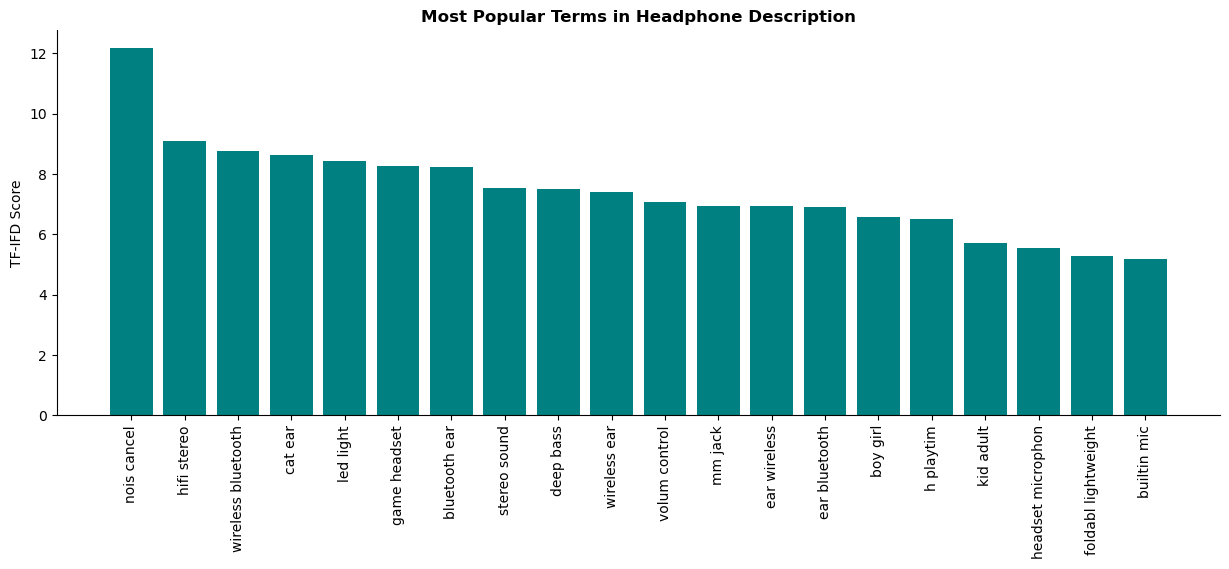

In [47]:
plt.figure(figsize=(15,5))

plt.bar(top_15_terms.term, top_15_terms.score, color = 'teal')
plt.xticks(rotation = 90)
plt.ylabel('TF-IFD Score')
plt.title('Most Popular Terms in Headphone Description', fontweight = 'bold')

ax = plt.gca()
ax.spines[['top','right']].set_visible(False)
plt.show()

----
**Plot Description:**

**Features:**

- Terms like "bluetooth" and "wireless" indicate a strong demand for wireless connectivity. The high frequency of "wireless" across many product descriptions suggests that this feature is increasingly desirable among consumers.
- Additionally, the noise-canceling feature appears popular.
- The term "foldable" also indicates a preference for headphone portability.
- There seems to be an overlap between the features identified in the TD-IDF analysis and those I extracted earlier in the project. The next step involves adding td-idf features to the orginal dataset, its porbably best to drop the features I extracted from the description to avoid redundancuy in the recommendation model.

**Target Audience:**

Interestingly, even when "adult headphones" are specified in the search, many product descriptions still reference "kid,".

**Sound Quality:**
The focus on phrases like "hifi stereo" and "deep bass" suggests grouping of users who prioritise audio quality. 

### Combine output of TF-IDF with df

#### 1. Selecting features to use from df

In [48]:
df.columns

Index(['Product ID', 'Description', 'Rating', 'Is Prime', 'Wireless',
       'Noise Cancelling', 'Battery Life', 'Microphone', 'Over Ear', 'Gaming',
       'Foldable', 'price_trans', 'Colour_Not Specified', 'Colour_Other',
       'Colour_black', 'Colour_blue', 'Colour_gold', 'Colour_green',
       'Colour_pink', 'Colour_purple', 'Colour_red', 'Colour_white'],
      dtype='object')

In [49]:
df['Battery Life']

0        0
1       18
2        0
3        0
4        0
5        0
6        0
7      110
8       65
9        0
10       0
11       0
12       0
13       0
14       0
15      40
16       0
17       3
18      40
19      70
20      40
21      50
22       0
23       0
24       0
25       0
26      65
27      40
28       3
29       0
30       0
31       0
32       0
33      70
34      60
35      50
36      40
37       0
38       0
39       0
40      60
41      65
42       0
43      90
44       0
45      65
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54      80
55      24
56       0
57      60
58       0
59       0
60       0
61       0
62      68
63      80
64      65
65       0
66       0
67       0
68       0
69      90
70      65
71     100
72       0
73      68
74      22
75       3
76       2
77       0
78      80
79       0
80       0
81      60
82       0
83      70
84       0
85      62
86      36
87       0
88      60
89       0
90       0

----
**Comment:**

Following features all are part of the td-idf features, this makes sense as i extracted these from the product description. I will NOT be inckuding these featrures in the recommonder:

- Wireless
- Noise Cancelling
- Microphone
- Over Ear
- Gaming
- Foldable
- All Colour fields

This leaves us with the following features for the recommender:

- Rating
- Is Prime
- Product ID
- price_trans
- Battery Life


#### Scaling of the Numeric Features

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['Battery Life','price_trans','Rating', 'Is Prime']])

In [51]:
scaled_df = pd.DataFrame(scaled_features, index=df.index, columns=['Battery Life','price_trans','Rating', 'Is Prime'])

#### Combining Scaled Features to TD-IDF df

In [52]:
combined_df = pd.concat([tf_idf_df, scaled_df], axis=1)

### Calculate Cosine Similarity

In [53]:
from sklearn.metrics.pairwise import cosine_similarity
# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(combined_df, dense_output=False)

#### Exporting Cosine Similarity

In [54]:
import joblib

joblib.dump(cosine_sim, '../../model/cosine_similarity_matrix.joblib')

['../../model/cosine_similarity_matrix.joblib']

### Making Recommendations - Content Based only

In [234]:
def content_recommender(product_id, similarities) :

# Find index of the product
    product_index = df[df['Product ID'] == product_id].index

    sim_df = pd.DataFrame(
        {'Product ID': df['Product ID'],
         'Similarity': similarities[product_index, :].flatten(),
         'Rating' :df['Rating']
        })
    
    # Ignore the first row of sim_df as this represents the given product_id
    sim_df = sim_df[sim_df['Product ID'] != product_id]
    
    top_df = sim_df[sim_df['Rating'] >= 4.0].sort_values(by='Similarity', ascending=False).head(10)
    top_df.reset_index(drop = True, inplace=True)
    return top_df

content_recommender('B0C3CX5M82',cosine_sim)

,Product ID,Similarity,Rating
0,B08HDBZNZ9,0.717132,4.3
1,B07KY8G9NM,0.681742,4.5
2,B0B7RZY38W,0.675274,4.5
3,B01ISLZUMU,0.657815,4.1
4,B08FBPL1D3,0.653222,4.4
5,B07WWH2Q3B,0.650868,4.5
6,B087FW1835,0.644563,4.2
7,B00NBR7962,0.643992,4.5
8,B09FF244QP,0.625059,4.3
9,B0C8SJSL9H,0.615542,4.4


## Evaluation - Content Based Recommender
-------

So far in this notebook, I have developed a content-based recommendation system to suggest products similar to a given product. 

Key Highlights:

- **Feature Extraction:** I used TF-IDF to analyse product descriptions and identify important most popular terms. This analysis helped in understanding general customer preferences and highlighted key features that are in demand.

- **Recommendation System:** Use cosine similarity calculations to create a recommender that recommends similar products to an exisitng product ID (to be passed in).

- **Data Limitations:** The only user related information in the dataset is an average user rating for each product. This has impacted the ability to add more complex methods to the recommender model. Additionally, a lack of information on user likes/dislikes makes it rather difficult to evaluate the model built. To me, the only evaluation method available would be through unit testing in the real world. 

In the future it would be worth considering methods to access specific user inforamtion to enhance the recommendation system.

Despite having only the average user ratings for each product, I plan to see if there is a way I can integrate some collaborative filtering methods with the exisiting content-based recommender. Hopefully, this would improve the recommendations made in real time.

### Inspecting Recommendations

In [256]:
recommended = content_recommender('B08HDBZNZ9',cosine_sim)

In [275]:
cols_to_scale = df.columns.drop(['Product ID', 'Description'])

In [288]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[cols_to_scale])
scaled_df = pd.DataFrame(scaled_features, columns=cols_to_scale, index=df.index)
# concat horizontally
result_df = pd.concat([df[['Product ID', 'Description']], scaled_df], axis=1)

In [289]:
def check_recommendations(recommendations, dataframe):

    # Define columns to check
    cols_to_compare = df.columns.drop(['Product ID', 'Description'])

    # Add in ranking to the output of recommedner
    recommendations['Ranking'] = recommendations['Similarity'].rank(ascending=False).astype(int)

    # Get first row as this corresponds to product id fed into recommender
    input_product = df[df['Product ID']==recommendations.iloc[0]['Product ID']][cols_to_compare].reset_index(drop=True)

    # List to store dict of scores
    my_dict = []

    for i,row in recommendations.iterrows():
        recommended_product = df[df['Product ID']==row['Product ID']][cols_to_compare].reset_index(drop=True)
        comparison = input_product == recommended_product

        sim_score = comparison.sum().sum()/len(cols_to_compare) * 100
        my_dict.append({'Recommended ID': row['Product ID'],
                    'Score': sim_score,
                    'Ranking':row['Ranking'],
                    'Similarity': row['Similarity']})
    
    reco_scores = pd.DataFrame(my_dict).sort_values(by='Ranking')
    return reco_scores



In [291]:
check_recommendations(recommendations= recommended, dataframe =result_df)

,Recommended ID,Score,Ranking,Similarity
0,B0C3CX5M82,100.0,1,0.717132
1,B01ISLZUMU,65.0,2,0.660261
2,B08FBPL1D3,60.0,3,0.657631
3,B07WWH2Q3B,65.0,4,0.656078
4,B087FW1835,65.0,5,0.651569
5,B00NBR7962,65.0,6,0.651143
6,B0C2CNHX82,65.0,7,0.643704
7,B0B7RZY38W,75.0,8,0.619782
8,B09RZWDXTK,70.0,9,0.615959
9,B0C8SJSL9H,65.0,10,0.594050


----
**Comment:**

Adding a rank column makes it easy (along with the similarity score) to see the previous order of recommendations based on the recommender.

Overall, there is a good alignment between my scores and those generated by the recommender, but there are a few differences.

This could be because my scores are generated from the features I extracted from the product descriptions. The recommender system uses TF-IDF tokens for its similarity calculations, which allows for a more detailed analysis and calculation of similarity.


## Integrating Collaborative Filtering Methods
-----

$$
\text{Combined Score} = \alpha \times \text{Cosine Similarity} + (1 - \alpha) \times \text{Normalised Rating}

$$

Formula Components:

- **Cosine Similarity**: Anlge between two product vectors, indicating how similar the two products are.
- **Normalised Rating**: Scaled average product user rating.
- **α (Alpha)**: A parameter to weight the influence of each component in the final score.

After researching online on hybird recommenders and using ChatGPT, I found this formula. It merges content-based filtering and collaborative filtering in order to it leverage both product features and user preferences.

### Adding Formula to Exisitng Recommender

In [269]:
def hybrid_recommender(product_id, similarities, alpha= 0.6) :

# Find index of the product
    product_index = df[df['Product ID'] == product_id].index

    cosine_sim = similarities[product_index, :].flatten()
    combined_score = (alpha * cosine_sim) + ((1 - alpha) * scaled_df['Rating'])

    sim_df = pd.DataFrame(
        {'Product ID': df['Product ID'],
         'Similarity': combined_score,
         'Rating' :df['Rating']
        })
    
    # Ignore the first row of sim_df as this represents the given product_id
    sim_df = sim_df[sim_df['Product ID'] != product_id]

    top_df = sim_df[sim_df['Rating'] >= 4.0].sort_values(by='Similarity', ascending=False).head(10)
    top_df.reset_index(drop = True, inplace=True)
    return top_df

In [270]:
hybrid_recommender('B08HDBZNZ9',cosine_sim)

,Product ID,Similarity,Rating
0,B0C3CX5M82,0.750279,4.2
1,B07WWH2Q3B,0.743647,4.5
2,B00NBR7962,0.740686,4.5
3,B08FBPL1D3,0.734579,4.4
4,B0D83F9V9T,0.724119,5.0
5,B0B7RZY38W,0.721869,4.5
6,B0C2CNHX82,0.716222,4.3
7,B087FW1835,0.710941,4.2
8,B0D7QBT7CJ,0.708598,5.0
9,B01ISLZUMU,0.706157,4.1


----
**Comment:**

Some differences in the products recommended:

- First we see the similarity with itself has dropped this is most likley due to the introduction of the combined score formula
- Difference in the similarity score, start to see some prodcuts with a higher score

The hybrid recommender now also prioritises products with higher user ratings, which may result in recommendations that are not strictly similar based on product features. The alpha parameter is key in balancing the two components of the hybrid model. I have set α to 0.6, slightly favouring products that are more similar in terms of features. 


In [295]:
check_recommendations(recommendations= hybrid_recommender('B08HDBZNZ9',cosine_sim), dataframe = result_df)

,Recommended ID,Score,Ranking,Similarity
0,B0C3CX5M82,100.0,1,0.717132
1,B01ISLZUMU,65.0,2,0.660261
2,B08FBPL1D3,60.0,3,0.657631
3,B07WWH2Q3B,65.0,4,0.656078
4,B087FW1835,65.0,5,0.651569
5,B00NBR7962,65.0,6,0.651143
6,B0C2CNHX82,65.0,7,0.643704
7,B0B7RZY38W,75.0,8,0.619782
8,B09RZWDXTK,70.0,9,0.615959
9,B0C8SJSL9H,65.0,10,0.594050


----
**Comment:**

Bit more of a stark difference here, I assume this is due to the combined score calculation in the hybrid recommneder as when I increase the alpha parameter there is less of a difference between the two scores.

## Evaluation - Hybrid Recommender
---

As stated earlier, due to the limited availability of user preference data in the scraped dataset I am unable to perform a thorough evaluation.

So, I plan to try evaluate both recommeders using Streamlit. It may be best to provide users with the option to choose which recommender system to use in Streamlit. This flexibility could help identify which approach resonates more with users and give an idea of which recommender is best.

## Conclusion
----

In this notebook, I explored TF-IDF method to analyse product descriptions and to build a content-based recommender system. 

Following this, I developed a hybrid recommender that incoporates both content-based filtering and collaborative filtering approaches, leveraging both product features and the average user product ratings.

Next, I plan to implement a Streamlit application to evaluate both the content-based and hybrid recommenders. This will allow for user interaction and feedback, enabling a better understanding of which recommendation system is best.
